https://learn.inside.dtu.dk/d2l/le/content/186439/viewContent/726161/View

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
Students = [120, 120]
Active = [22, 27]
Conversion = [0.183, 0.225]
df = pd.DataFrame(data=[Students, Active, Conversion], columns=["Module A", "Module B"])
df

,Module A,Module B
0,120.000,120.000
1,22.000,27.000
2,0.183,0.225


Investigate a possible difference in the modules using a statistical test. Give an interpretation of
the hypothesis of no difference.

In [22]:
import statsmodels.api as sm
import math
import scipy

In [23]:
successes = df.iloc[1]
trials = df.iloc[0]
z_stat, p_value = sm.stats.proportions_ztest(successes, trials)
p_value

0.42331487293262593

In [32]:
from scipy.stats import chi2_contingency

contingency_table = pd.DataFrame({'Successes': df.iloc[1], 'Failures': df.iloc[0] - df.iloc[1]})

chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2_stat}")
print(f"P-value: {p_value}")

Chi-square statistic: 0.4103002457527513
P-value: 0.5218171518126997


In [31]:
p = 0.183
n = 120
alpha = 0.235
z = abs(scipy.stats.norm.ppf(alpha / 2))
p - z * math.sqrt((p*(1-p))/n), p + z * math.sqrt((p*(1-p))/n)

(0.14108129820059764, 0.22491870179940235)

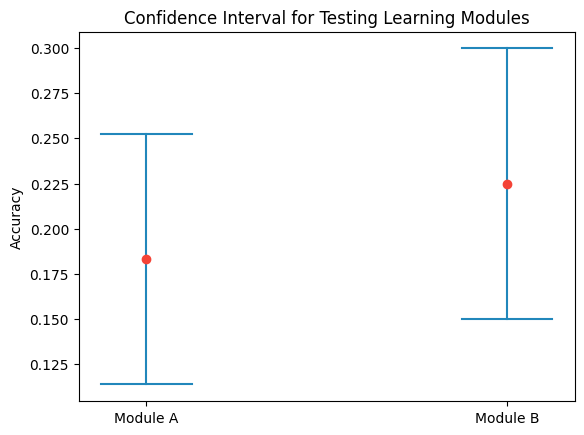

In [2]:
from math import sqrt
import statistics
import matplotlib.pyplot as plt

def plot_confidence_interval(x, p, n, z=1.96, color='#2187bb', horizontal_line_width=0.25):
    confidence_interval = z * sqrt((p*(1-p))/n)
    left = x - horizontal_line_width / 2
    top = p - confidence_interval
    right = x + horizontal_line_width / 2
    bottom = p + confidence_interval
    plt.plot([x, x], [top, bottom], color=color)
    plt.plot([left, right], [top, top], color=color)
    plt.plot([left, right], [bottom, bottom], color=color)
    plt.plot(x, p, 'o', color='#f44336')

plt.xticks([1, 2], ['Module A', 'Module B'])
plt.title('Confidence Interval for Testing Learning Modules')
plot_confidence_interval(1, 0.183, 120)
plot_confidence_interval(2, 0.225, 120)
plt.ylabel('Accuracy')
plt.show()

No significant difference using propertions test. Approve the nul hypotheses of no difference

-------

If we conclude that Module B is better than Module A, what is the probability that this is a
false conclusion?

Bootstrap

This would, in this case, be wrong, as the p-value is larger than alpha

42%?, 23.5%?

-------

On the other hand, if we conclude that there is no difference between Modules A and B, what is
the probability that this is a false conclusion?

This is true, 5% probability of being wrong

------

Could the platform have used the average time spent on each learning module as the performance
metric in a comparison instead of the conversion rate? Argue why or why not.

Yes, can do p-test on if there is a difference, would probably be better to test on.
Conversion is a bit vaguely described

Could offer some problems as to what a good time is

If use a lot of time could both be too difficult or interesting by student, so could both be good and bad at the same time - conversion is easier to conclude from

--------

What are the sources that can cause violation of assumptions in your test?

Paired t-test assumptions

Subjects must be independent. Measurements for one subject do not affect measurements for any other subject.

Each of the paired measurements must be obtained from the same subject. ...

The measured differences are normally distributed.

Must be independent

Assumptions of random sampling

The binomial distribution is in effect. Fixed number of trials. Trials are independent. Two categories for outcomes. 

Probabilities constant for each trial.

There are at least 5 successes and at least 5 failures.

np≥5 n p ≥ 5 and nq≥5.

------

Consider that the type of course (mathematics vs. literature) is a possible confounder for the
conversion rate. Investigate how you can take this confounder into account when comparing the
two learning modules using a statistical test.

Kruskal wallis, ANCOVA

-------

In [53]:
data_class1 = {
    "Module A": [120, 22, 0.183],
    "Module B": [120, 27, 0.225]
}

# Data for the second class (Module C and Module D)
data_class2 = {
    "Module C": [120, 20, 0],  # Replace x, y, z with the actual data for Module C
    "Module D": [120, 50, 0]   # Replace a, b, c with the actual data for Module D
}

In [54]:

df_class1 = pd.DataFrame(data_class1, index=["Students", "Active", "Conversion"])
df_class2 = pd.DataFrame(data_class2, index=["Students", "Active", "Conversion"])

In [55]:
combined_data = pd.concat([df_class1, df_class2], axis=1)

# contingency_table_combined = pd.DataFrame({
#     'Module A': combined_data.loc['Active', 'Module A'],
#     'Module B': combined_data.loc['Active', 'Module B'],
#     'Module C': combined_data.loc['Active', 'Module C'],
#     'Module D': combined_data.loc['Active', 'Module D']
# })

In [56]:
chi2_stat, p_value, dof, expected = chi2_contingency(combined_data)

# Print the results
print(f"Chi-square statistic: {chi2_stat}")
print(f"P-value: {p_value}")

Chi-square statistic: 14.83293114909458
P-value: 0.021596703662165605


In [57]:
df_class1 = pd.DataFrame(data_class1, index=["Students", "Active", "Conversion"])
df_class2 = pd.DataFrame(data_class2, index=["Students", "Active", "Conversion"])

# Calculate differences for each module pair
diff_AB = df_class1["Module B"] - df_class1["Module A"]
diff_CD = df_class2["Module D"] - df_class2["Module C"]

# Compare the differences
chi2_stat, p_value = chi2_contingency([diff_AB, diff_CD])

# Print the results
print(f"Chi-square statistic: {chi2_stat}")
print(f"P-value: {p_value}")

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/lucasvilsen/Library/Python/3.11/lib/python/site-packages/IPython/core/interactiveshell.py", line 3460, in run_code
  File "/var/folders/pl/7f1cr2657p3bnpdt3bnm_9w00000gn/T/ipykernel_60246/4005412315.py", line 9, in <module>
    chi2_stat, p_value = chi2_contingency([diff_AB, diff_CD])
                         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/homebrew/lib/python3.11/site-packages/scipy/stats/contingency.py", line 340, in chi2_contingency
    raise ValueError("The internally computed table of expected "
ValueError: The internally computed table of expected frequencies has a zero element at (0, 0).

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/lucasvilsen/Library/Python/3.11/lib/python/site-packages/IPython/core/interactiveshell.py", line 2057, in showtraceback
  File "/Users/lucasvilsen/Library/Python/3.11/lib/python/site-packages/IPython/core/ultra